In [4]:
import torch
import torch.nn as nn
from transformers import CLIPVisionModelWithProjection, ViTForImageClassification, AutoModelForCausalLM
from transformers import AutoModel, AutoTokenizer, LlamaForCausalLM

import sys, os, json, math
from tqdm import tqdm
import numpy as np

from scipy.stats import pearsonr, spearmanr

import re
import matplotlib.pyplot as plt
std = 0.012528747320175171

In [6]:
lyr_list = ['q', 'k', 'v', 'o', 'up', 'gate', 'down']

keys = ['proxy_err', 'tr(WHW.T)', 'mse']
# 첫 번째 데이터 로드
data = {}
for k in keys:
    data[k] = {}
for i in range(32):
    for lyr in lyr_list:
        qtip_path = f'../qtip/ckpt/noft2/2_7b_3bit/{i}_{lyr}.pt'
        l = torch.load(qtip_path)
        for k in keys:
            data[k][f'{i}_{lyr}'] = l[k]

data2 = {}
for k in keys:
    data2[k] = {}
for i in range(32):
    for lyr in lyr_list:
        path = f'../comp_lm_qtip/ckpt/noft/meta-llama--Llama-2-7b-hf/lmbda100_ql/{i}_{lyr}.pt'
        l = torch.load(path)
        for k in keys:
            data2[k][f'{i}_{lyr}'] = l[k]


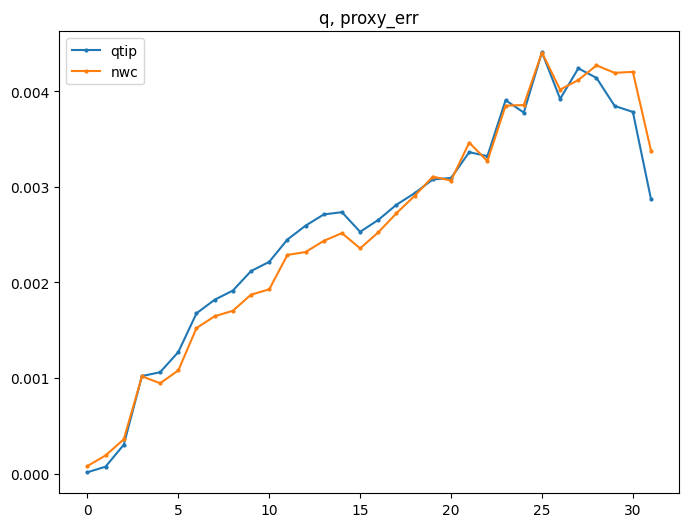

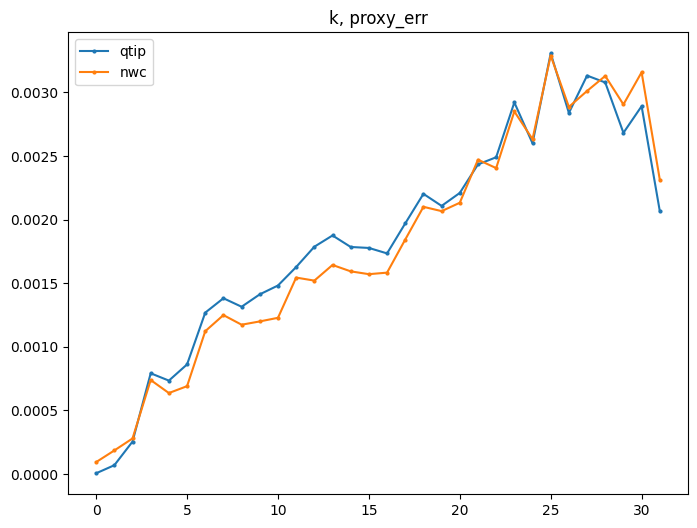

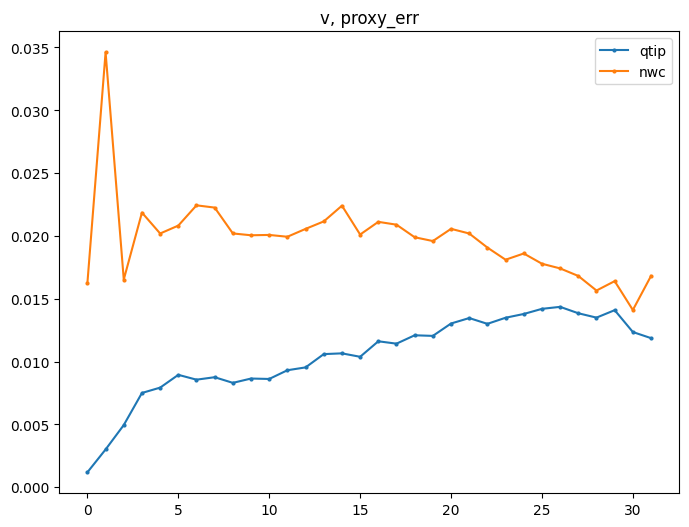

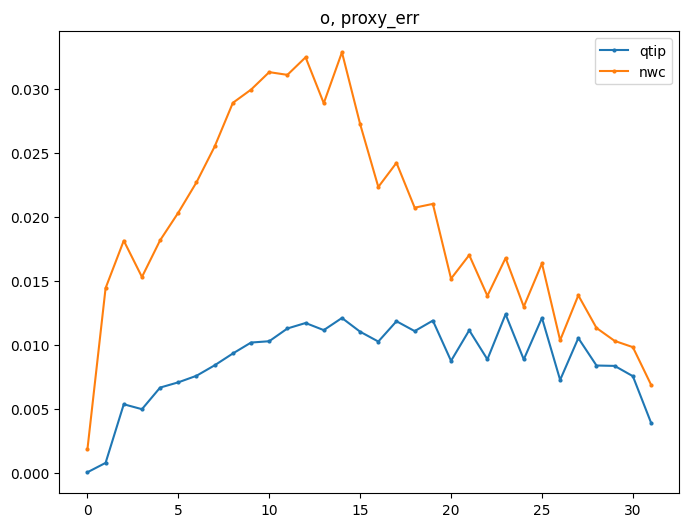

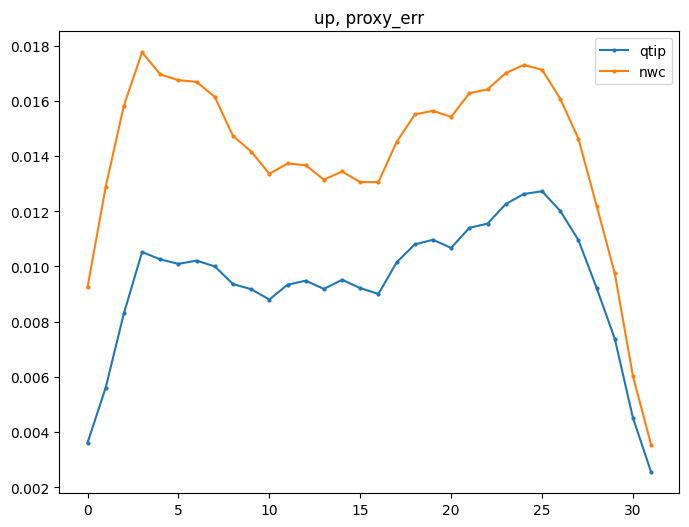

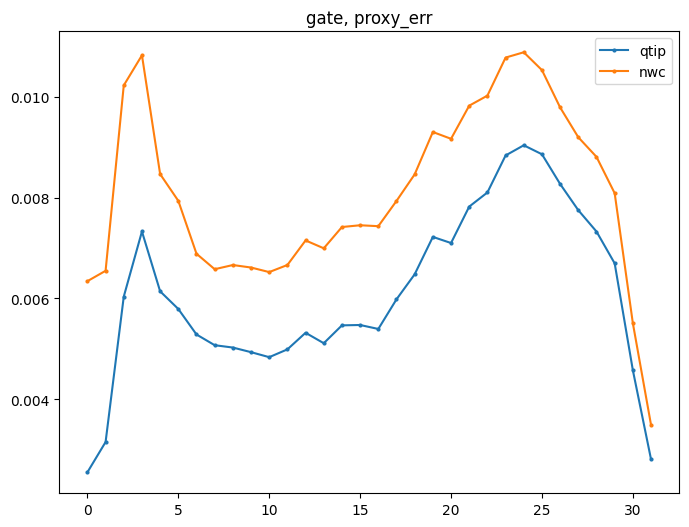

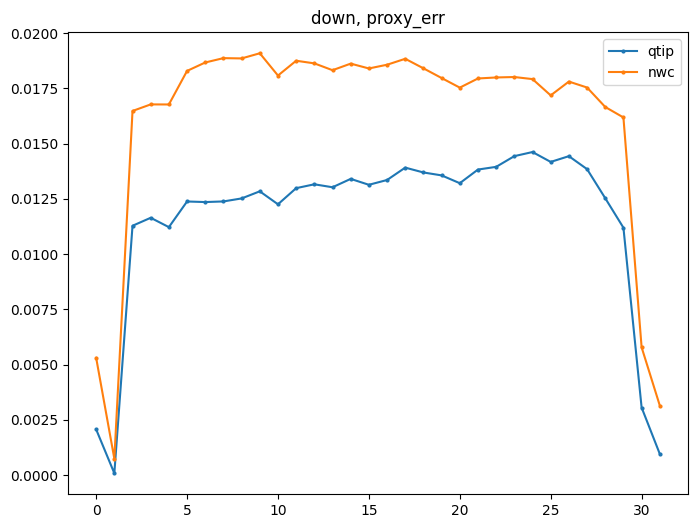

In [ ]:



k = 'mse'
k = 'proxy_err'
for lyr in lyr_list:
    list = []
    list2 = []
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    for i in range(32):
        list.append(data[k][f'{i}_{lyr}'])
        list2.append(data2[k][f'{i}_{lyr}'])
    ax.plot(list, marker='o', ms='2', label='qtip')
    ax.plot(list2, marker='o', ms='2',label='nwc')
    plt.title(f'{lyr}, {k}')
    plt.legend()
    plt.show()

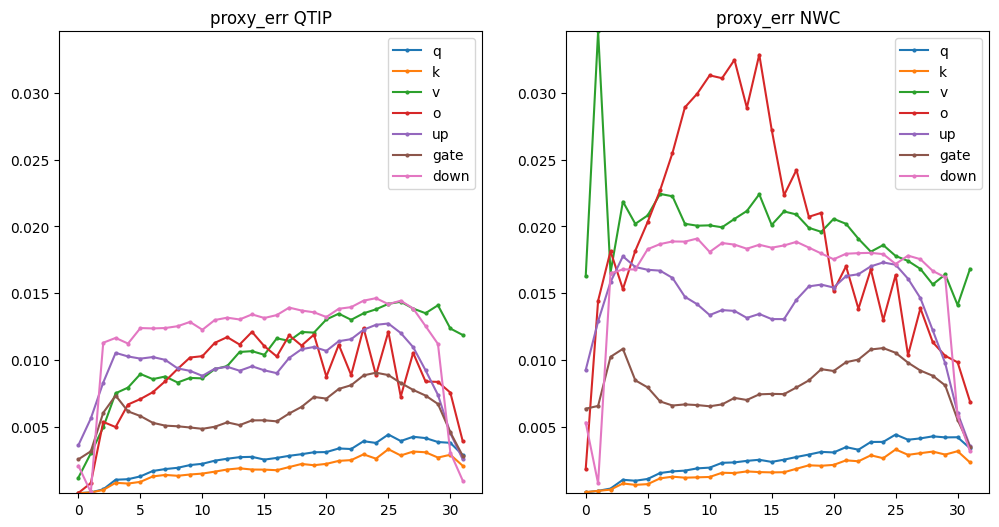

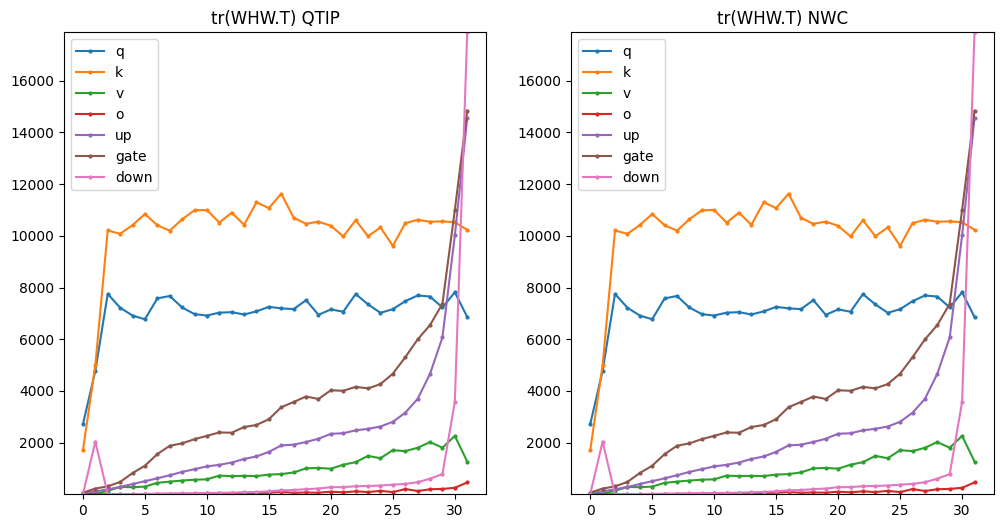

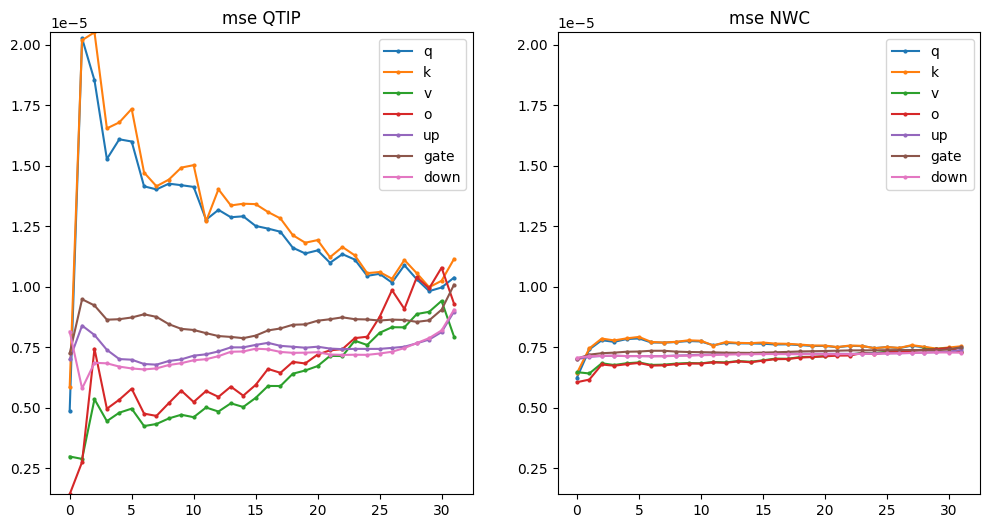

In [91]:
import matplotlib.pyplot as plt
for k in keys:
    
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    mse_values = {lyr: [data[k][f'{i}_{lyr}'] for i in range(32)] for lyr in lyr_list}
    mse2_values = {lyr: [data2[k][f'{i}_{lyr}'] for i in range(32)] for lyr in lyr_list}

    # 최소/최대값 구하기
    all_values = [val for values in mse_values.values() for val in values] + \
                [val for values in mse2_values.values() for val in values]
    y_min, y_max = min(all_values), max(all_values)

    # 첫 번째 그래프
    for lyr in lyr_list:
        ax1.plot(mse_values[lyr], label=lyr, marker='o', ms=2)
    ax1.set_ylim(y_min, y_max)

    # 두 번째 그래프
    for lyr in lyr_list:
        ax2.plot(mse2_values[lyr], label=lyr, marker='o', ms=2)
    ax2.set_ylim(y_min, y_max)

    # 범례 및 표시
    ax1.set_title(f"{k} QTIP")
    ax2.set_title(f"{k} NWC")
    ax1.legend()
    ax2.legend()
    plt.show()


100


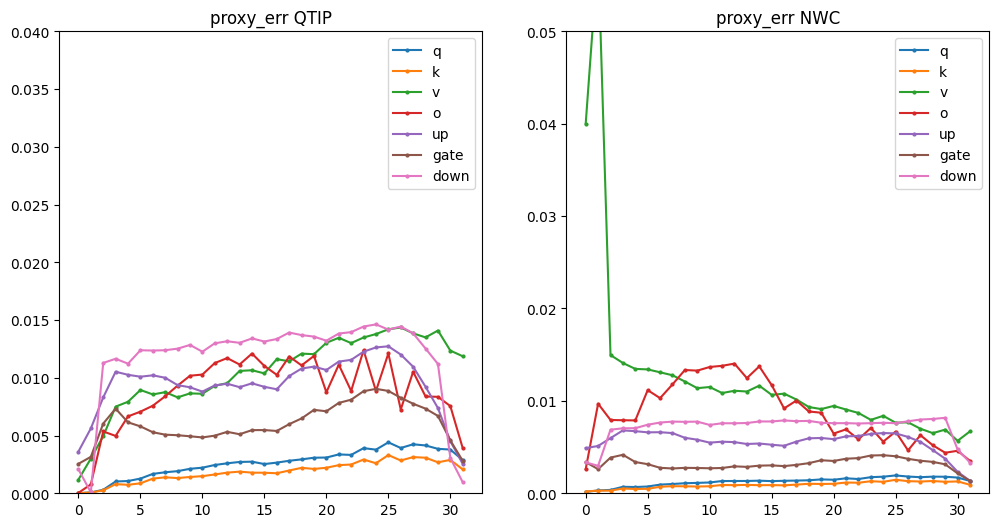

In [18]:
lyr_list = ['q', 'k', 'v', 'o', 'up', 'gate', 'down']

keys = ['proxy_err', 'tr(WHW.T)', 'mse']
keys = ['proxy_err']

# 첫 번째 데이터 로드
# data = {}
# for k in keys:
#     data[k] = {}
# for i in range(32):
#     for lyr in lyr_list:
#         qtip_path = f'../qtip/ckpt/noft2/2_7b_3bit/{i}_{lyr}.pt'
#         l = torch.load(qtip_path)
#         for k in keys:
#             data[k][f'{i}_{lyr}'] = l[k]

for lm in [100]:
    print(lm)
    
    data2 = {}
    for k in keys:
        data2[k] = {}
        for i in range(32):
            for lyr in lyr_list:
                # path = f'../comp_lm_qtip/ckpt/ft//meta-llama--Llama-2-7b-hf/lmbda{lm}_ql_ldlq/{i}_{lyr}.pt'
                # path = f'../comp_lm_qtip/ckpt/ft//meta-llama--Llama-2-7b-hf/lmbda{lm}_ql/{i}_{lyr}.pt'
                path = f'../comp_lm_qtip/ckpt/noft/had_train2/meta-llama--Llama-2-7b-hf/lmbda{lm}_had/{i}_{lyr}.pt'
                l = torch.load(path)
                for k in keys:
                    data2[k][f'{i}_{lyr}'] = l[k]

    for k in keys:
        
        fig = plt.figure(figsize=(12, 6))
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)

        mse_values = {lyr: [data[k][f'{i}_{lyr}'] for i in range(32)] for lyr in lyr_list}
        mse2_values = {lyr: [data2[k][f'{i}_{lyr}'] for i in range(32)] for lyr in lyr_list}

        # 최소/최대값 구하기
        # all_values = [val for values in mse_values.values() for val in values] + \
        #             [val for values in mse2_values.values() for val in values]
        # y_min, y_max = min(all_values), max(all_values)

        # 첫 번째 그래프
        for lyr in lyr_list:
            ax1.plot(mse_values[lyr], label=lyr, marker='o', ms=2)
        # ax1.set_ylim(y_min, y_max)
        ax1.set_ylim(0, 0.04)
        

        # 두 번째 그래프
        for lyr in lyr_list:
            ax2.plot(mse2_values[lyr], label=lyr, marker='o', ms=2)
        ax2.set_ylim(0, 0.05)
        # ax2.set_ylim(y_min, y_max)

        # 범례 및 표시
        ax1.set_title(f"{k} QTIP")
        ax2.set_title(f"{k} NWC")
        ax1.legend()
        ax2.legend()
        plt.show()
